<a href="https://colab.research.google.com/github/JcandZero/Test-task/blob/main/%E6%83%85%E6%84%9F%E5%88%86%E6%9E%90.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [622]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import jieba.posseg as psg


In [623]:
import warnings
warnings.filterwarnings("ignore")

path = '/content/try'

raw_data = pd.read_csv("/content/try/comments5.csv")
print(raw_data.shape)
raw_data.head()

(1978, 2)


,content,content_type
0,华为手机品质保证，京东物流也想当给力,pos
1,很棒，已经多次购买了,pos
2,到货及时，价格实惠。,pos
3,价格便宜，就是到货时间长点,pos
4,官网有货，京东等了十天，差点取消了，还好坚持等了，看中的就是京东的服务和售后，手机不错,pos




---




##数据预处理



# 删除数据记录中所有列值相同的记录

In [624]:
reviews=raw_data.copy()
reviews = reviews[['content', 'content_type']].drop_duplicates()
content = reviews
reviews.shape
content=reviews['content']

reviews

,content,content_type
0,华为手机品质保证，京东物流也想当给力,pos
1,很棒，已经多次购买了,pos
2,到货及时，价格实惠。,pos
3,价格便宜，就是到货时间长点,pos
4,官网有货，京东等了十天，差点取消了，还好坚持等了，看中的就是京东的服务和售后，手机不错,pos
...,...,...
1668,一个很不合理的现象，你花更多的钱，却得到更低的套餐。平台自己上的链接出了问题，无冲版要比标准...,pos
1727,耗电速度特别快，跟我一个使用两年的耗电量差不多，不像正品，送过去退换就说检测没有问题不给换新...,pos
1849,发热太严重了，就算看看视频手机也烫手的很，刚开始几天还卡，直接卡关机了,neg
1917,不错，但过了几天就降价了，小200快，有点吭,pos


In [625]:
for i in range(5,10):
    print(content[i])
    print('-----------')

此用户未及时填写评价内容,信号特别差，等很久都没有信号 购买需谨慎 ?……
-----------
华为手机，我们全家信赖的品牌。坚信国产手机一定会跨越重重困难，迎来崭新的未来！
-----------
用了一段时间再过来评论.手机确实非常的好.当初就盯着这个牌子手机。外形外观：外形非常的漂亮大气拍照效果：嗯，拍照效果很好。
-----------
还不错 符合预期和要求
-----------
期待了好久的手机，等好几个月才买到，开车好几十公里去拿的手机，抢到了白色真好看，收到之后很好看，真的很漂亮特别漂亮，屏幕音质很不错，运行超快。
-----------


In [626]:
print(type(content))

<class 'pandas.core.series.Series'>



# 去除英文、数字、京东、华为、手机等词语

In [627]:
strinfo = re.compile('[0-9a-zA-Z]|京东|华为|手机|苹果|充电器|高|')
content=content.apply(lambda x: strinfo.sub('',str(x)))  #替换所有匹配项
print(content.head())


0                             品质保证，物流也想当给力
1                               很棒，已经多次购买了
2                               到货及时，价格实惠。
3                            价格便宜，就是到货时间长点
4    官网有货，等了十天，差点取消了，还好坚持等了，看中的就是的服务和售后，不错
Name: content, dtype: object


# 分词

In [628]:
worker = lambda s: [(x.word, x.flag) for x in psg.cut(s)] # 自定义简单分词函数
seg_word = content.apply(worker)

seg_word.head()
# 将词语转为数据框形式，一列是词，一列是词语所在的句子ID，最后一列是词语在该句子的位置
n_word = seg_word.apply(lambda x: len(x))  # 每一评论中词的个数

n_content = [[x+1]*y for x,y in zip(list(seg_word.index), list(n_word))]

In [629]:
n_word = seg_word.apply(lambda x: len(x))  # 每一评论中词的个数

n_content = [[x+1]*y for x,y in zip(list(seg_word.index), list(n_word))]

In [630]:
index_content = sum(n_content, [])# 将嵌套的列表展开，作为词所在评论的id

seg_word = sum(seg_word, []) # 词

In [631]:
word = [x[0] for x in seg_word]# 词性

In [632]:
nature = [x[1] for x in seg_word]#词性

In [633]:
content_type = [[x]*y for x,y in zip(list(reviews['content_type']), list(n_word))]

content_type = sum(content_type, [])#评论类型

#结果

In [634]:
result = pd.DataFrame({"index_content":index_content, 
                       "word":word,
                       "nature":nature,
                       "content_type":content_type})

result.head()


,index_content,word,nature,content_type
0,1,品质,n,pos
1,1,保证,v,pos
2,1,，,x,pos
3,1,物流,n,pos
4,1,也,d,pos


#删除标点符号

In [635]:
result = result[result['nature'] != 'x']  # x表示标点符号

# 删除停用词

In [636]:
stop_path = open("/content/try/stoplist.txt", 'r',encoding='UTF-8')
stop = stop_path.readlines()
stop = [x.replace('\n', '') for x in stop]
word = list(set(word) - set(stop))
result = result[result['word'].isin(word)]

result.head()

,index_content,word,nature,content_type
0,1,品质,n,pos
1,1,保证,v,pos
3,1,物流,n,pos
5,1,想,v,pos
8,1,力,n,pos



# 构造各词在对应评论的位置列

In [637]:
n_word = list(result.groupby(by = ['index_content'])['index_content'].count())
index_word = [list(np.arange(0, y)) for y in n_word]

index_word = sum(index_word, [])# 词语在该评论的位置

# 合并评论id

In [638]:
result['index_word'] = index_word

result

,index_content,word,nature,content_type,index_word
0,1,品质,n,pos,0
1,1,保证,v,pos,1
3,1,物流,n,pos,2
5,1,想,v,pos,3
8,1,力,n,pos,4
...,...,...,...,...,...
33533,1937,降价,n,pos,6
33535,1937,补,v,pos,7
33536,1937,差价,n,pos,8
33541,1937,差,a,pos,9


# 提取含有名词类的评论,即词性含有“n”的评论

In [639]:
ind = result[['n' in x for x in result['nature']]]['index_content'].unique()
result = result[[x in ind for x in result['index_content']]]
result.head()


,index_content,word,nature,content_type,index_word
0,1,品质,n,pos,0
1,1,保证,v,pos,1
3,1,物流,n,pos,2
5,1,想,v,pos,3
8,1,力,n,pos,4


In [640]:
result

,index_content,word,nature,content_type,index_word
0,1,品质,n,pos,0
1,1,保证,v,pos,1
3,1,物流,n,pos,2
5,1,想,v,pos,3
8,1,力,n,pos,4
...,...,...,...,...,...
33533,1937,降价,n,pos,6
33535,1937,补,v,pos,7
33536,1937,差价,n,pos,8
33541,1937,差,a,pos,9


In [641]:

# 将结果保存
result.to_csv("/content/try/word.csv", index = False, encoding = 'utf-8')



In [642]:
word = pd.read_csv("/content/try/word.csv")

In [643]:
word

,index_content,word,nature,content_type,index_word
0,1,品质,n,pos,0
1,1,保证,v,pos,1
2,1,物流,n,pos,2
3,1,想,v,pos,3
4,1,力,n,pos,4
...,...,...,...,...,...
14137,1937,降价,n,pos,6
14138,1937,补,v,pos,7
14139,1937,差价,n,pos,8
14140,1937,差,a,pos,9


##词云

In [644]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from PIL import Image
import wordcloud

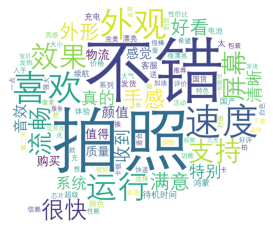

In [645]:
frequencies = result.groupby(by = ['word'])['word'].count()
frequencies = frequencies.sort_values(ascending = False)
backgroud_Image=plt.imread('/content/try/pl.jpg')


wordcloud = WordCloud(font_path="/content/try/Deng.ttf",
                      max_words=100,
                      background_color='white',
                      mask=backgroud_Image)

my_wordcloud = wordcloud.fit_words(frequencies)

plt.imshow(my_wordcloud)
plt.axis('off')
plt.show()


# 读入正面、负面情感评价词

In [646]:
import pandas as pd
import numpy as np
word = pd.read_csv("/content/try/word.csv")

In [647]:
pos_comment = pd.read_csv("/content/try/正面评价词语（中文）.txt", header=None,sep="\n",
                          encoding = 'utf-8', engine='python')
neg_comment = pd.read_csv("/content/try/负面评价词语（中文）.txt", header=None,sep="\n",
                          encoding = 'utf-8', engine='python')
pos_emotion = pd.read_csv("/content/try/正面情感词语（中文）.txt", header=None,sep="\n",
                          encoding = 'utf-8', engine='python')
neg_emotion = pd.read_csv("/content/try/负面情感词语（中文）.txt", header=None,sep="\n",
                          encoding = 'utf-8', engine='python')

# 合并情感词与评价词

In [648]:
positive = set(pos_comment.iloc[:,0])|set(pos_emotion.iloc[:,0])
negative = set(neg_comment.iloc[:,0])|set(neg_emotion.iloc[:,0])

正负面情感词表中相同的词语

In [649]:
intersection = positive&negative

positive = list(positive - intersection)
negative = list(negative - intersection)

positive = pd.DataFrame({"word":positive,
                         "weight":[1]*len(positive)})
negative = pd.DataFrame({"word":negative,
                         "weight":[-1]*len(negative)})

posneg = positive.append(negative)


In [650]:
positive

,word,weight
0,靓,1
1,英姿飒爽,1
2,有一手,1
3,满腔热情,1
4,腴,1
...,...,...
4435,勤奋,1
4436,有见识,1
4437,敦敦实实,1
4438,心地纯良,1


In [651]:
negative

,word,weight
0,看不上,-1
1,孤僻,-1
2,贫穷,-1
3,隐身,-1
4,耻骂,-1
...,...,...
4237,暗朦,-1
4238,昏天黑地,-1
4239,没味,-1
4240,贫,-1


# 将分词结果与正负面情感词表合并，定位情感词

In [652]:
data_posneg = posneg.merge(word, left_on = 'word', right_on = 'word',
                           how = 'right')
data_posneg = data_posneg.sort_values(by = ['index_content','index_word'])

data_posneg.head()


,word,weight,index_content,nature,content_type,index_word
0,品质,NaN,1,n,pos,0
1,保证,NaN,1,v,pos,1
2,物流,NaN,1,n,pos,2
3,想,NaN,1,v,pos,3
4,力,NaN,1,n,pos,4


# 载入否定词表

In [653]:
notdict = pd.read_csv("/content/try/not.csv")

data_posneg['amend_weight'] = data_posneg['weight'] #构造新列，作为经过否定词修正后的情感值
data_posneg['id'] = np.arange(0, len(data_posneg))
only_inclination = data_posneg.dropna().reset_index(drop=True)#只保留有情感值的词语

index = only_inclination['id']


In [654]:
for i in np.arange(0, len(only_inclination)):
   # 提取第i个情感词所在的评论
    review = data_posneg[data_posneg['index_content'] == only_inclination['index_content'][i]]
    review.index = np.arange(0, len(review))
    # 第i个情感值在该文档的位置
    affective = only_inclination['index_word'][i]
    if affective == 1:
        ne = sum([i in notdict['term'] for i in review['word'][affective - 1]])%2
        if ne == 1:
            data_posneg['amend_weight'][index[i]] = -data_posneg['weight'][index[i]]          
    elif affective > 1:
        ne = sum([i in notdict['term'] for i in review['word'][[affective - 1, 
                  affective - 2]]])%2
        if ne == 1:
            data_posneg['amend_weight'][index[i]] = -data_posneg['weight'][index[i]]

In [655]:
only_inclination = only_inclination.dropna()# 更新只保留情感值的数据
#计算每条评论的情感值
emotional_value = only_inclination.groupby(['index_content'], as_index=False)['amend_weight'].sum()
emotional_value = emotional_value[emotional_value['amend_weight'] != 0]#去除情感值为0的评论

给情感值大于0的赋予评论类型（content_type）为pos,小于0的为neg

In [656]:
emotional_value['a_type'] = ''
emotional_value['a_type'][emotional_value['amend_weight'] > 0] = 'pos'
emotional_value['a_type'][emotional_value['amend_weight'] < 0] = 'neg'

emotional_value.head()


,index_content,amend_weight,a_type
0,5,1.0,pos
1,7,1.0,pos
2,13,1.0,pos
3,17,1.0,pos
4,19,-1.0,neg


# 查看情感分析结果

In [657]:
result = emotional_value.merge(word, 
                               left_on = 'index_content', 
                               right_on = 'index_content',
                               how = 'left')
result.head()



,index_content,amend_weight,a_type,word,nature,content_type,index_word
0,5,1.0,pos,官网,n,pos,0
1,5,1.0,pos,货,n,pos,1
2,5,1.0,pos,十天,m,pos,2
3,5,1.0,pos,差点,n,pos,3
4,5,1.0,pos,取消,v,pos,4


In [658]:
result = result[['index_content','content_type', 'a_type']].drop_duplicates()
result.head()

,index_content,content_type,a_type
0,5,pos,pos
10,7,pos,pos
20,13,pos,pos
35,17,pos,pos
51,19,neg,neg


交叉表:统计分组频率的特殊透视表

In [659]:
confusion_matrix = pd.crosstab(result['content_type'], result['a_type'], 
                               margins=True)
confusion_matrix.head()

(confusion_matrix.iat[0,0] + confusion_matrix.iat[1,1])/confusion_matrix.iat[2,2]

0.032846715328467155

提取正负面评论信息

In [660]:
# 提取正负面评论信息
ind_pos = list(emotional_value[emotional_value['a_type'] == 'pos']['index_content'])
ind_neg = list(emotional_value[emotional_value['a_type'] == 'neg']['index_content'])
posdata = word[[i in ind_pos for i in word['index_content']]]
negdata = word[[i in ind_neg for i in word['index_content']]]


In [661]:
posdata

,index_content,word,nature,content_type,index_word
12,5,官网,n,pos,0
13,5,货,n,pos,1
14,5,十天,m,pos,2
15,5,差点,n,pos,3
16,5,取消,v,pos,4
...,...,...,...,...,...
14053,1486,很快,d,neg,4
14054,1486,款,m,neg,5
14055,1486,适合,v,neg,6
14056,1486,喜欢,v,neg,7


# 绘制词云

In [662]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

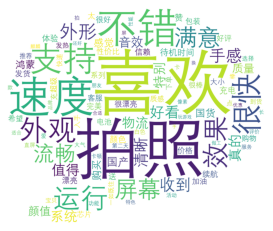

In [663]:
freq_pos = posdata.groupby('word')['word'].count()
freq_pos = freq_pos.sort_values(ascending = False)
backgroud_Image=plt.imread("/content/try/pl.jpg")
wordcloud = WordCloud(font_path="/content/try/Deng.ttf",
                      max_words=100,
                      background_color='white',
                      mask=backgroud_Image)
pos_wordcloud = wordcloud.fit_words(freq_pos)
plt.imshow(pos_wordcloud)
plt.axis('off')
plt.show()


# 负面情感词词云

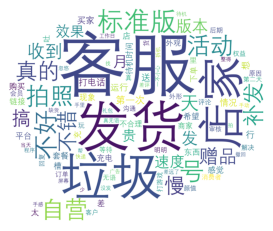

In [664]:
freq_neg = negdata.groupby(by = ['word'])['word'].count()
freq_neg = freq_neg.sort_values(ascending = False)
neg_wordcloud = wordcloud.fit_words(freq_neg)
plt.imshow(neg_wordcloud)
plt.axis('off')
plt.show()

In [666]:
git remote add origin https://github.com/JcandZero/AI-Pating.git
git branch -M main
git push -u origin main

SyntaxError: ignored